In [81]:
import pandas as pd
import numpy as np
import ast

from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

import random
import shap

In [82]:
def classification_performance(X, y, model):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    predictions = cross_val_predict(model, X_scaled, y, cv=3)
    print(classification_report(y, predictions))
    
    return predictions

In [83]:
df = pd.read_csv("data/annotated_dataset/annotated_texts_repr_pro_complete.csv", sep=",", encoding="utf-8")

In [84]:
X_tfidf = df["tfidf_pro"] #len: 357
X_tfidf = np.array([ast.literal_eval(item) for item in X_tfidf])

y_pop = np.vstack(df["pop_sum"].values)
y_pol = np.vstack(df["polarization"].values)

y_pop = [0 if x < 2 else 1 for x in y_pop]

In [85]:
interpretable_feats = ['parte','molto','lavoro','quando','anni','provvedimento','solo','prima','ancora','presidente','paese','legge','signor','governo','poi','fatto','italia','politica','commissione','già','stato','oggi','articolo','essere','ministro','quindi','fare','decreto','stars','score','neutral','approval','annoyance','realization','disapproval','confusion','disappointment','admiration','anger','disgust','amusement','optimism','excitement','sadness','joy','curiosity','fear','surprise','love','caring','gratitude','embarrassment','desire','grief','pride','relief','nervousness']
feature_names = ["f"+str(i) for i in range(300)] + interpretable_feats

In [86]:
def SHAP_analysis(X, y, n_classes):
    svc = LinearSVC(dual=False, max_iter=10000, C=0.1, class_weight='balanced', loss='squared_hinge', penalty= 'l1')
    y_pred = classification_performance(X, y, svc)
    
    misclassified_indices = np.where(y_pred != y)[0]
    correctly_classified_indices = np.where(y_pred == y)[0]
    
    X = pd.DataFrame(X, columns = feature_names)
    
    random.seed(42)
    misclassified_instance = X.iloc[random.choice(misclassified_indices)].to_frame().T if len(misclassified_indices) > 0 else None
    correctly_classified_instance = X.iloc[random.choice(correctly_classified_indices)].to_frame().T if len(correctly_classified_indices) > 0 else None
    
    model = LinearSVC(dual=False, max_iter=10000, C=0.1, class_weight='balanced', loss='squared_hinge', penalty= 'l1')
    model.fit(X, y)
    
    explainer = shap.Explainer(model, X)
    
    if misclassified_instance is not None:
        shap_values_misclassified = explainer(misclassified_instance)
        print("Classificazione errata:")
        if n_classes==2:
            shap.waterfall_plot(shap_values_misclassified[0], max_display=12)
        else:
            shap.waterfall_plot(shap_values_misclassified[0][:, np.argmax(model.predict(misclassified_instance))], max_display=12)

    if correctly_classified_instance is not None:
        shap_values_correct = explainer(correctly_classified_instance)
        print("Classificazione corretta:")
        if n_classes==2:
            shap.waterfall_plot(shap_values_correct[0], max_display=12)
        else:
            shap.waterfall_plot(shap_values_correct[0][:, np.argmax(model.predict(correctly_classified_instance))], max_display=12)

# TF-IDF

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6366
           1       0.75      0.80      0.78      4474

    accuracy                           0.81     10840
   macro avg       0.80      0.81      0.81     10840
weighted avg       0.81      0.81      0.81     10840

Classificazione errata:


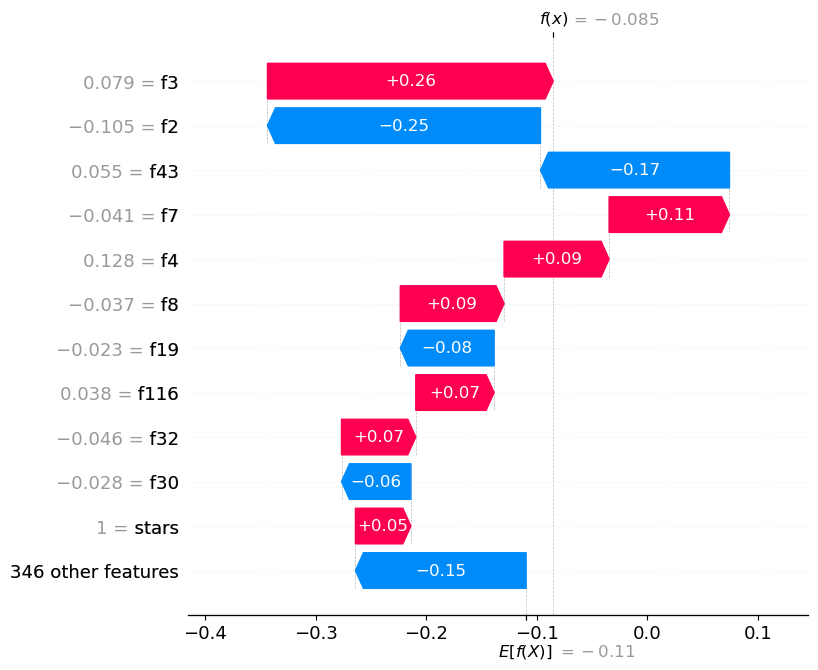

Classificazione corretta:


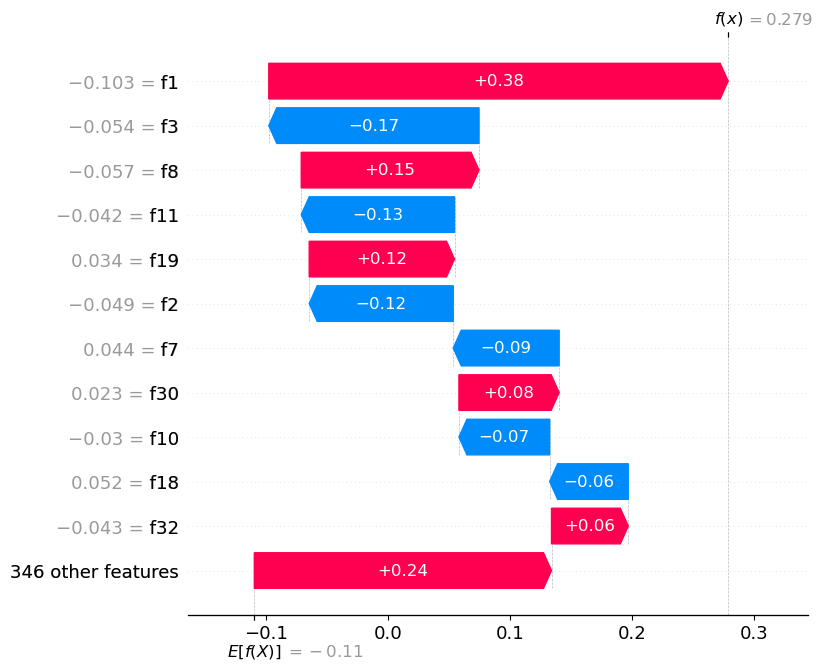

In [88]:
SHAP_analysis(X_tfidf, y_pop, 2)

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1651
           1       0.67      0.65      0.66      4957
           2       0.72      0.69      0.71      4232

    accuracy                           0.65     10840
   macro avg       0.62      0.63      0.62     10840
weighted avg       0.66      0.65      0.65     10840



C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classificazione errata:


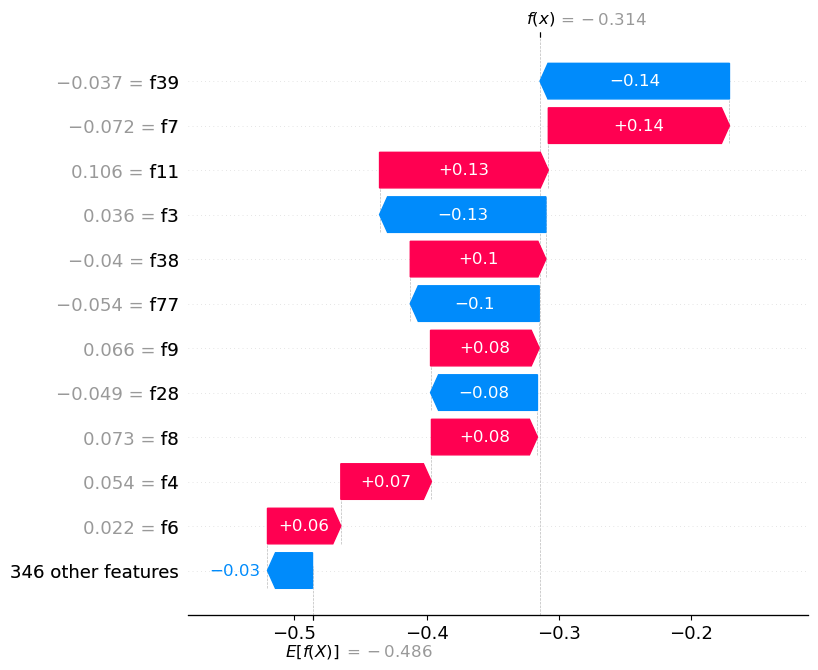

Classificazione corretta:


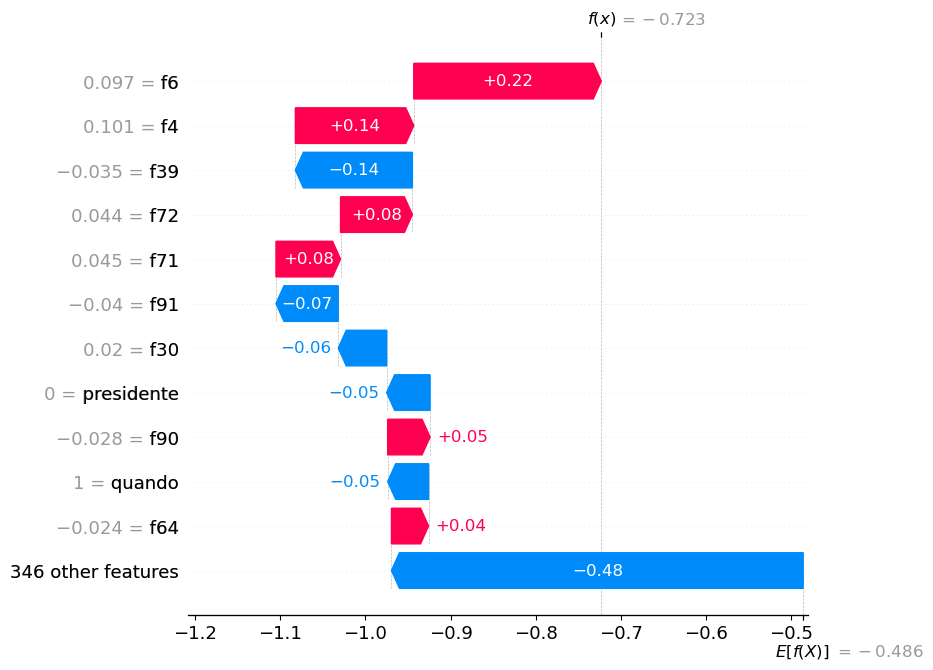

In [89]:
SHAP_analysis(X_tfidf, y_pol, 3)

# Linguistic Profile

In [90]:
X_lp = df["linguistic_profile_pro"] #len: 201
X_lp = np.array([ast.literal_eval(item) for item in X_lp])

In [91]:
ling_features = ['n_sentences','n_tokens','tokens_per_sent','char_per_tok','ttr_lemma_chunks_100','ttr_lemma_chunks_200','ttr_form_chunks_100','ttr_form_chunks_200','upos_dist_ADJ','upos_dist_ADP','upos_dist_ADV','upos_dist_AUX','upos_dist_CCONJ','upos_dist_DET','upos_dist_INTJ','upos_dist_NOUN','upos_dist_NUM','upos_dist_PART','upos_dist_PRON','upos_dist_PROPN','upos_dist_PUNCT','upos_dist_SCONJ','upos_dist_SYM','upos_dist_VERB','upos_dist_X','lexical_density','verbs_tense_dist_Fut','verbs_tense_dist_Imp','verbs_tense_dist_Past','verbs_tense_dist_Pres','verbs_mood_dist_Cnd','verbs_mood_dist_Imp','verbs_mood_dist_Ind','verbs_mood_dist_Sub','verbs_form_dist_Fin','verbs_form_dist_Ger','verbs_form_dist_Inf','verbs_form_dist_Part','verbs_num_pers_dist_+','verbs_num_pers_dist_+3','verbs_num_pers_dist_Plur+','verbs_num_pers_dist_Plur+1','verbs_num_pers_dist_Plur+2','verbs_num_pers_dist_Plur+3','verbs_num_pers_dist_Sing+1','verbs_num_pers_dist_Sing+2','verbs_num_pers_dist_Sing+3','aux_tense_dist_Fut','aux_tense_dist_Imp','aux_tense_dist_Past','aux_tense_dist_Pres','aux_mood_dist_Cnd','aux_mood_dist_Imp','aux_mood_dist_Ind','aux_mood_dist_Sub','aux_form_dist_Fin','aux_form_dist_Ger','aux_form_dist_Inf','aux_form_dist_Part','aux_num_pers_dist_Plur+1','aux_num_pers_dist_Plur+2','aux_num_pers_dist_Plur+3','aux_num_pers_dist_Sing+1','aux_num_pers_dist_Sing+2','aux_num_pers_dist_Sing+3','verbal_head_per_sent','verbal_root_perc','avg_verb_edges','verb_edges_dist_0','verb_edges_dist_1','verb_edges_dist_2','verb_edges_dist_3','verb_edges_dist_4','verb_edges_dist_5','verb_edges_dist_6','avg_max_depth','avg_token_per_clause','avg_max_links_len','avg_links_len','max_links_len','avg_prepositional_chain_len','n_prepositional_chains','prep_dist_1','prep_dist_2','prep_dist_3','prep_dist_4','prep_dist_5','obj_pre','obj_post','subj_pre','subj_post','dep_dist_acl','dep_dist_acl:relcl','dep_dist_advcl','dep_dist_advmod','dep_dist_amod','dep_dist_appos','dep_dist_aux','dep_dist_aux:pass','dep_dist_case','dep_dist_cc','dep_dist_ccomp','dep_dist_compound','dep_dist_conj','dep_dist_cop','dep_dist_csubj','dep_dist_dep','dep_dist_det','dep_dist_det:poss','dep_dist_det:predet','dep_dist_discourse','dep_dist_dislocated','dep_dist_expl','dep_dist_expl:impers','dep_dist_expl:pass','dep_dist_fixed','dep_dist_flat','dep_dist_flat:foreign','dep_dist_flat:name','dep_dist_iobj','dep_dist_mark','dep_dist_nmod','dep_dist_nsubj','dep_dist_nsubj:pass','dep_dist_nummod','dep_dist_obj','dep_dist_obl','dep_dist_obl:agent','dep_dist_orphan','dep_dist_parataxis','dep_dist_punct','dep_dist_root','dep_dist_vocative','dep_dist_xcomp','principal_proposition_dist','subordinate_proposition_dist','subordinate_post','subordinate_pre','avg_subordinate_chain_len','subordinate_dist_1','subordinate_dist_2','subordinate_dist_3','subordinate_dist_4','subordinate_dist_5']
feature_names = ling_features + interpretable_feats

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      6366
           1       0.69      0.74      0.72      4474

    accuracy                           0.76     10840
   macro avg       0.75      0.75      0.75     10840
weighted avg       0.76      0.76      0.76     10840



C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classificazione errata:


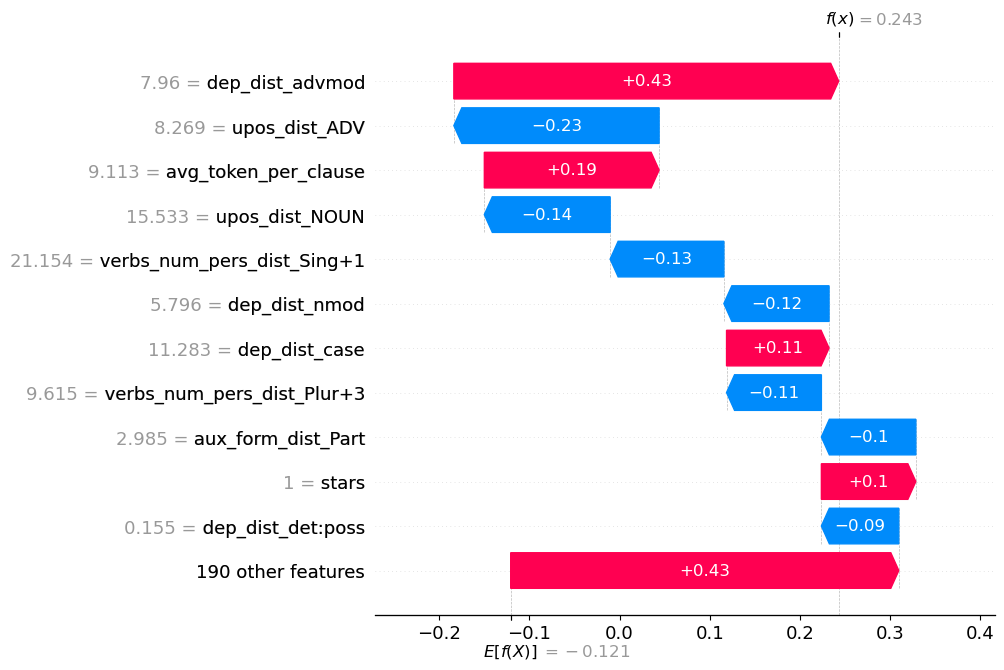

Classificazione corretta:


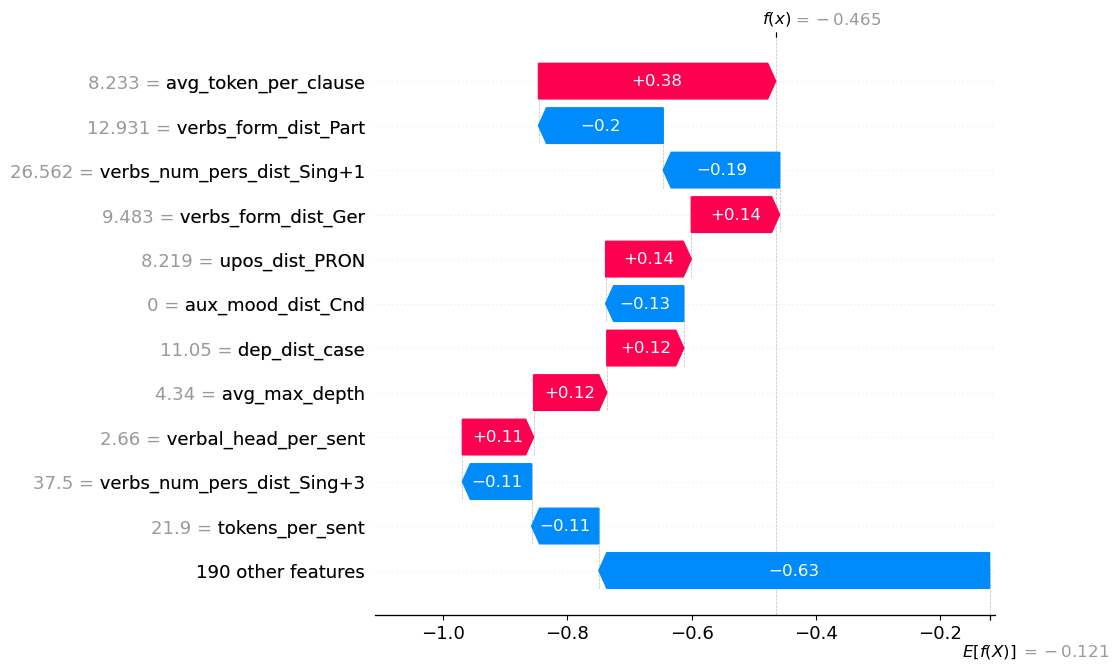

In [92]:
SHAP_analysis(X_lp, y_pop, 2)

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.30      0.34      0.32      1651
           1       0.60      0.53      0.57      4957
           2       0.58      0.63      0.61      4232

    accuracy                           0.54     10840
   macro avg       0.50      0.50      0.50     10840
weighted avg       0.55      0.54      0.54     10840



C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classificazione errata:


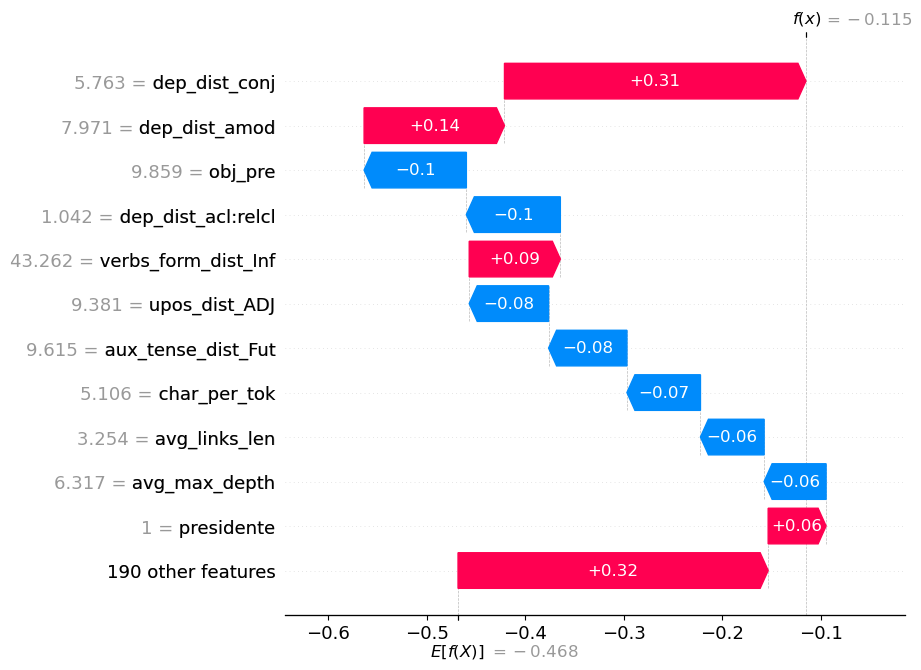

Classificazione corretta:


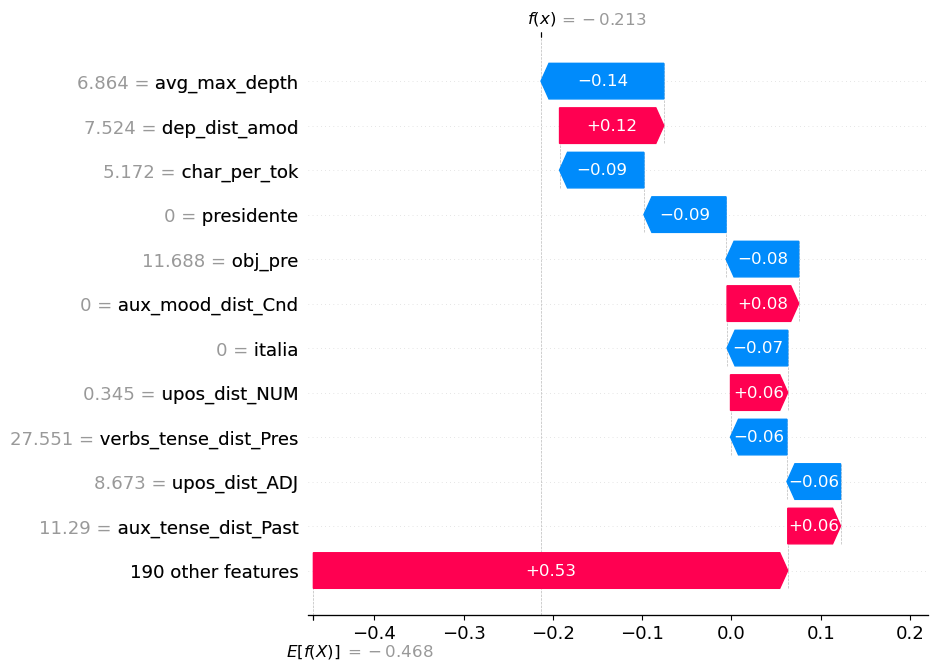

In [93]:
SHAP_analysis(X_lp, y_pol, 3)